### C247A Project

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [17]:
import numpy as np
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


### Shape of data

In [18]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Preprocessing the Data:

In [4]:
y_train_valid -= 769
y_test -= 769

In [5]:
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [44]:
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

(1692, 22, 1000) (1692,) (423, 22, 1000) (423,)


### Counting the Number of the first object:

In [22]:
count = 0
for i in range(2115):
    if(person_train_valid[i] == 1):
        count += 1
    else:
        count = count

t_count = 0
for j in range(443):
    if(person_test[j] == 1):
        t_count += 1
    else:
        t_count = t_count

print("The number of subject 1 in the validation is:", count)
print("The number of subject 1 in the testing is:", t_count)

The number of subject 1 in the validation is: 236
The number of subject 1 in the testing is: 50


### RNN Part:

### Keras RNN:

This part is provided from the notebook of keras rnn.

In [8]:
from keras import layers, models
from keras import regularizers
from keras import optimizers
from keras.layers import Activation, Dense, TimeDistributed, Flatten
from keras.layers import Permute, Bidirectional, BatchNormalization, Conv2D, LSTM, Dense, Dropout, ELU, Flatten, MaxPool2D, TimeDistributed
from keras import layers, models
from keras import backend as K

In [9]:
hidden_dim = 20

### Setup the model and parameters and train the network across subject 1:

In [57]:
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000)))
model.add(layers.SimpleRNN(hidden_dim))
model.add(layers.Dense(4, activation='softmax'))
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [58]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.SimpleRNN(hidden_dim)(p1)
outputs = layers.Dense(16, activation='softmax')(rnn)

In [59]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [60]:
X1train = Xtrain[:236,:,:]
y1train = ytrain[:236]
X1val=Xval[:50,:,:]
y1val=yval[:50]

loss_hist = model.fit(X1train, y1train, validation_data=(X1val, y1val), epochs=20)

Train on 236 samples, validate on 50 samples
Epoch 1/20
236/236 [==============================] - 1s 5ms/step - loss: 3.2774 - acc: 0.0636 - val_loss: 3.3341 - val_acc: 0.0400
Epoch 2/20
236/236 [==============================] - 1s 4ms/step - loss: 3.1309 - acc: 0.0805 - val_loss: 3.2319 - val_acc: 0.0800
Epoch 3/20
236/236 [==============================] - 1s 4ms/step - loss: 3.0155 - acc: 0.0975 - val_loss: 3.1403 - val_acc: 0.0800
Epoch 4/20
236/236 [==============================] - 1s 4ms/step - loss: 2.9141 - acc: 0.1229 - val_loss: 3.0830 - val_acc: 0.0800
Epoch 5/20
236/236 [==============================] - 1s 4ms/step - loss: 2.8354 - acc: 0.1483 - val_loss: 3.0460 - val_acc: 0.0800
Epoch 6/20
236/236 [==============================] - 1s 4ms/step - loss: 2.7824 - acc: 0.1822 - val_loss: 3.0236 - val_acc: 0.1000
Epoch 7/20
236/236 [==============================] - 1s 4ms/step - loss: 2.7393 - acc: 0.2076 - val_loss: 2.9763 - val_acc: 0.1000
Epoch 8/20
236/236 [===========

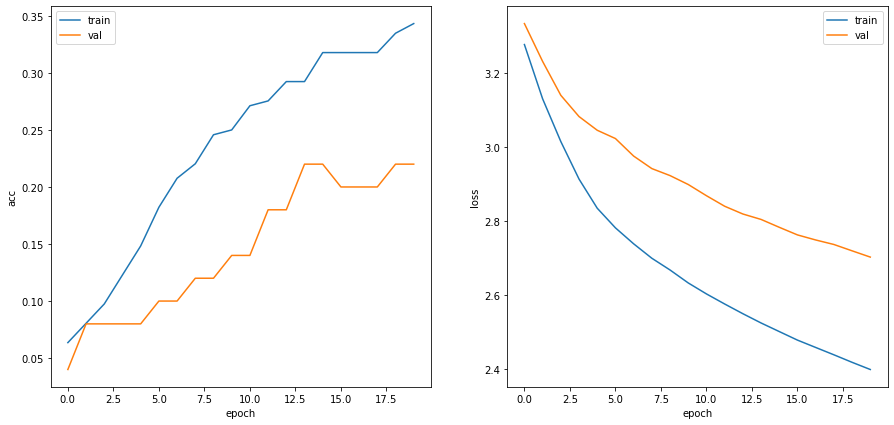

In [61]:
hist = loss_hist.history
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

### Setup the model and parameters and train the network across all subjects:

In [28]:
model = models.Sequential()
model.add(layers.Permute((2, 1), input_shape=(22, 1000)))
model.add(layers.SimpleRNN(hidden_dim))
model.add(layers.Dense(4, activation='softmax'))
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [29]:
inputs = layers.Input(shape=(22, 1000))
p1 = layers.Permute((2, 1))(inputs)
rnn = layers.SimpleRNN(hidden_dim)(p1)
outputs = layers.Dense(4, activation='softmax')(rnn)

In [30]:
model = models.Model(inputs=inputs, outputs=outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [61]:
loss_hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=10)

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - ETA: 17s - loss: 1.5379 - acc: 0.28 - ETA: 11s - loss: 1.5721 - acc: 0.26 - ETA: 8s - loss: 1.6853 - acc: 0.2708 - ETA: 7s - loss: 1.7287 - acc: 0.257 - ETA: 6s - loss: 1.7070 - acc: 0.268 - ETA: 6s - loss: 1.6967 - acc: 0.265 - ETA: 5s - loss: 1.6932 - acc: 0.263 - ETA: 5s - loss: 1.7006 - acc: 0.261 - ETA: 5s - loss: 1.7192 - acc: 0.250 - ETA: 5s - loss: 1.7439 - acc: 0.243 - ETA: 4s - loss: 1.7491 - acc: 0.247 - ETA: 4s - loss: 1.7468 - acc: 0.250 - ETA: 4s - loss: 1.7463 - acc: 0.245 - ETA: 4s - loss: 1.7467 - acc: 0.245 - ETA: 4s - loss: 1.7412 - acc: 0.245 - ETA: 3s - loss: 1.7363 - acc: 0.248 - ETA: 3s - loss: 1.7344 - acc: 0.240 - ETA: 3s - loss: 1.7154 - acc: 0.248 - ETA: 3s - loss: 1.7177 - acc: 0.246 - ETA: 3s - loss: 1.7217 - acc: 0.240 - ETA: 3s - loss: 1.7141 - acc: 0.241 - ETA: 3s - loss: 1.7082 - acc: 0.237 - ETA: 3s - loss: 1.7070 - acc: 0.236 - ETA: 2s - loss: 1.7119

1692/1692 [==============================] - ETA: 24s - loss: 1.3975 - acc: 0.37 - ETA: 23s - loss: 1.3990 - acc: 0.31 - ETA: 23s - loss: 1.3617 - acc: 0.33 - ETA: 19s - loss: 1.3649 - acc: 0.32 - ETA: 16s - loss: 1.3762 - acc: 0.31 - ETA: 14s - loss: 1.3699 - acc: 0.32 - ETA: 12s - loss: 1.3645 - acc: 0.31 - ETA: 11s - loss: 1.3581 - acc: 0.32 - ETA: 10s - loss: 1.3596 - acc: 0.30 - ETA: 9s - loss: 1.3596 - acc: 0.3187 - ETA: 8s - loss: 1.3552 - acc: 0.329 - ETA: 8s - loss: 1.3539 - acc: 0.330 - ETA: 7s - loss: 1.3510 - acc: 0.338 - ETA: 7s - loss: 1.3477 - acc: 0.343 - ETA: 6s - loss: 1.3502 - acc: 0.339 - ETA: 6s - loss: 1.3523 - acc: 0.332 - ETA: 6s - loss: 1.3601 - acc: 0.325 - ETA: 5s - loss: 1.3622 - acc: 0.326 - ETA: 5s - loss: 1.3689 - acc: 0.317 - ETA: 5s - loss: 1.3694 - acc: 0.318 - ETA: 5s - loss: 1.3768 - acc: 0.311 - ETA: 4s - loss: 1.3685 - acc: 0.322 - ETA: 4s - loss: 1.3680 - acc: 0.322 - ETA: 4s - loss: 1.3676 - acc: 0.324 - ETA: 4s - loss: 1.3677 - acc: 0.321 - ETA:

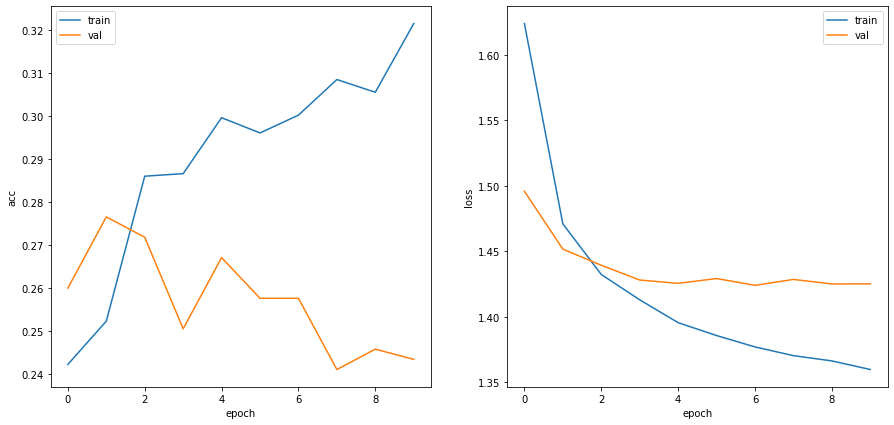

In [63]:
hist = loss_hist.history
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

### Convolutional 1D Cascading to LSTM :

The model for this part contains two portions: CNN part and RNN(LSTM) part.

For CNN, I cascaded four layers of convolutional layer together. After testing out the performance of each activation, ELU activation function was selected and batchnormalization and dropout is done for each layer. The momentum was selected as 0.999, and the dropout rate selected is 0.2. 

For LSTM part, there is only one LSTM layer. For the optimizer, Nadam optimizer was selected due to the best performance among all the provided ones. The learning rate of the optimizer is set to 1e-3 due to the testing. 

In [62]:
model = models.Sequential()


################################
model.add(layers.Conv1D(filters = 32, kernel_size = 1, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation='relu', use_bias=True, 
                                        kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                                        kernel_constraint=None, bias_constraint=None))
model.add(ELU())
model.add(layers.BatchNormalization(axis = 1, momentum = 0.99, epsilon =1e-8 , center = True, scale=True, 
                                    beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint= None))
model.add(layers.Dropout(rate=0.2))
#################################


model.add(layers.Conv1D(filters = 32, kernel_size = 1, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation='relu', use_bias=True, 
                                        kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                                        kernel_constraint=None, bias_constraint=None))
model.add(ELU())
model.add(layers.BatchNormalization(axis = 1, momentum = 0.99, epsilon = 1e-8, center = True, scale=True, 
                                    beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint= None))
model.add(layers.MaxPooling1D(pool_size=1, strides=None, padding='valid', data_format='channels_last'))

model.add(layers.Dropout(rate=0.2))
#################################


model.add(layers.Conv1D(filters = 32, kernel_size = 1, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation='relu', use_bias=True, 
                                        kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                                        kernel_constraint=None, bias_constraint=None))
model.add(ELU())
model.add(layers.BatchNormalization(axis = 1, momentum = 0.99, epsilon = 1e-8, center = True, scale=True, 
                                   beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                   beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint= None))
model.add(layers.MaxPooling1D(pool_size=1, strides=None, padding='valid', data_format='channels_last'))

model.add(layers.Dropout(rate=0.2))
###################################

model.add(layers.Conv1D(filters = 32, kernel_size = 1, strides=1, padding='valid', data_format='channels_last', dilation_rate=1, activation='relu', use_bias=True, 
                                        kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
                                        kernel_constraint=None, bias_constraint=None))
model.add(ELU())
model.add(layers.BatchNormalization(axis = 1, momentum = 0.99, epsilon = 1e-8, center = True, scale=True, 
                                    beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                    beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint= None))
model.add(layers.MaxPooling1D(pool_size=1, strides=None, padding='valid', data_format='channels_last'))

model.add(layers.Dropout(rate=0.2))
###################################


model.add(layers.Permute((2, 1), input_shape=(22, 1000)))

model.add(layers.LSTM(units=4, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros',
                        unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.2, recurrent_dropout=0.0, implementation=2, 
                        return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))

model.add(layers.LSTM(units=4, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros',
                        unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.2, recurrent_dropout=0.0, implementation=2, 
                        return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))

model.add(layers.LSTM(units=4, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros',
                        unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.2, recurrent_dropout=0.0, implementation=2, 
                        return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))

model.add(layers.LSTM(units=4, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
                        kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros',
                        unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                        kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.2, recurrent_dropout=0.0, implementation=2, 
                        return_sequences=True, return_state=False, go_backwards=False, stateful=False, unroll=False))

model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(32, use_bias=False))
model.add(layers.BatchNormalization())
model.add(Activation("softmax"))

#model.add(layers.Dense(32, activation='softmax'))

model.add(layers.Dropout(rate=0.2))
nadam = optimizers.Nadam(lr=1e-3, beta_1=0.9, beta_2=0.9)
model.compile(optimizer = nadam, loss= 'sparse_categorical_crossentropy', metrics=['acc'])

In [63]:
inputs = layers.Input(shape=(22, 1000))

c1 = layers.BatchNormalization(axis=1)(inputs)
c1 = layers.Conv1D(16, 1)(c1)
c1 = layers.ELU()(c1)
c1 = layers.BatchNormalization(axis=1)(c1)
c1 = layers.Dropout(rate=0.2)(c1)

c2 = layers.BatchNormalization(axis=1)(c1)
c2 = layers.Conv1D(32, 1)(c2)
c2 = layers.ELU()(c2)
c2 = layers.BatchNormalization(axis=1)(c2)
c2 = layers.MaxPooling1D()(c2)
c2 = layers.Dropout(rate=0.2)(c2)

c3 = layers.BatchNormalization(axis=1)(c2)
c3 = layers.Conv1D(64, 1)(c3)
c3 = layers.ELU()(c3)
c3 = layers.BatchNormalization(axis=1)(c3)
c3 = layers.MaxPooling1D()(c3)
c3 = layers.Dropout(rate=0.2)(c3)

c4 = layers.BatchNormalization(axis=1)(c3)
c4 = layers.Conv1D(128, 1)(c4)
c4 = layers.ELU()(c4)
c4 = layers.BatchNormalization(axis=1)(c4)
c4 = layers.MaxPooling1D()(c4)
c4 = layers.Dropout(rate=0.2)(c4)

p1 = layers.Permute((2, 1))(c4)
    
LSTM1 = layers.LSTM(units=4)(p1)

#rnn = layers.SimpleRNN(hidden_dim)(p1)

outputs = layers.Dense(32, use_bias=False)(LSTM1)
outputs = layers.BatchNormalization()(outputs)
outputs = layers.Activation("softmax")(outputs)


#outputs = layers.Dense(32, activation='softmax')(rnn)
outputs = layers.Dropout(rate=0.2)(outputs)

In [64]:
model = models.Model(inputs=inputs, outputs=outputs)
nadam = optimizers.Nadam(lr=1e-3, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = nadam, loss= 'sparse_categorical_crossentropy', metrics=['acc'])

### Testing Across subject 1:

In [65]:
X1train = Xtrain[:236,:,:]
y1train = ytrain[:236]
X1val=Xval[:50,:,:]
y1val=yval[:50]

loss_hist = model.fit(X1train, y1train, validation_data=(X1val, y1val), epochs=20)

Train on 236 samples, validate on 50 samples
Epoch 1/20
236/236 [==============================] - 3s 12ms/step - loss: 6.1742 - acc: 0.0381 - val_loss: 3.4584 - val_acc: 0.0400
Epoch 2/20
236/236 [==============================] - 0s 2ms/step - loss: 5.8877 - acc: 0.0424 - val_loss: 3.4483 - val_acc: 0.0400
Epoch 3/20
236/236 [==============================] - 0s 2ms/step - loss: 6.1850 - acc: 0.0339 - val_loss: 3.4362 - val_acc: 0.1800
Epoch 4/20
236/236 [==============================] - 0s 2ms/step - loss: 5.3038 - acc: 0.0593 - val_loss: 3.4231 - val_acc: 0.2200
Epoch 5/20
236/236 [==============================] - 0s 2ms/step - loss: 5.8236 - acc: 0.1144 - val_loss: 3.4074 - val_acc: 0.2200
Epoch 6/20
236/236 [==============================] - 0s 2ms/step - loss: 5.5628 - acc: 0.1186 - val_loss: 3.3906 - val_acc: 0.2200
Epoch 7/20
236/236 [==============================] - 0s 2ms/step - loss: 5.7890 - acc: 0.1441 - val_loss: 3.3784 - val_acc: 0.2400
Epoch 8/20
236/236 [==========

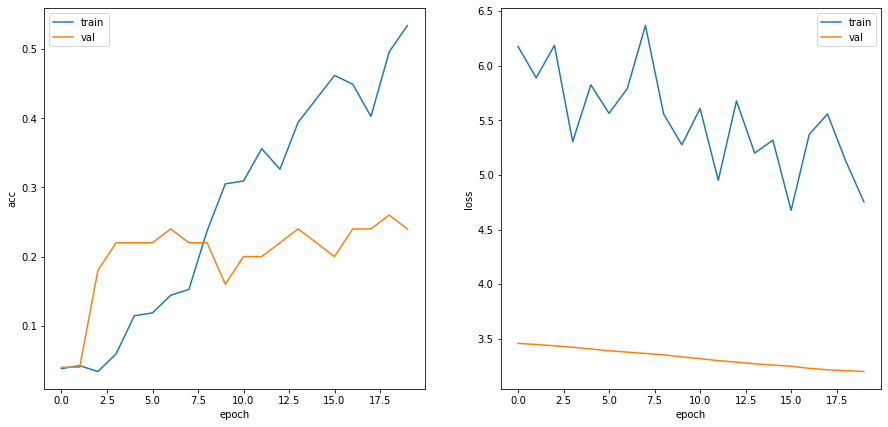

In [66]:
type(loss_hist)
hist = loss_hist.history
list(hist)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

### Testing Across all subjects:

In [15]:
loss_hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval), epochs=20)

Train on 1692 samples, validate on 423 samples
Epoch 1/20
1692/1692 [==============================] - 7s 4ms/step - loss: 5.9977 - acc: 0.0449 - val_loss: 3.3808 - val_acc: 0.2482
Epoch 2/20
1692/1692 [==============================] - 3s 1ms/step - loss: 5.6550 - acc: 0.1182 - val_loss: 3.2967 - val_acc: 0.3121
Epoch 3/20
1692/1692 [==============================] - 3s 2ms/step - loss: 5.6837 - acc: 0.2204 - val_loss: 3.2027 - val_acc: 0.2884
Epoch 4/20
1692/1692 [==============================] - 3s 2ms/step - loss: 5.5157 - acc: 0.2926 - val_loss: 3.1122 - val_acc: 0.3073
Epoch 5/20
1692/1692 [==============================] - 3s 2ms/step - loss: 5.5068 - acc: 0.3180 - val_loss: 3.0132 - val_acc: 0.3121
Epoch 6/20
1692/1692 [==============================] - 3s 2ms/step - loss: 5.2063 - acc: 0.3440 - val_loss: 2.9228 - val_acc: 0.2955
Epoch 7/20
1692/1692 [==============================] - 3s 2ms/step - loss: 5.1241 - acc: 0.3658 - val_loss: 2.8372 - val_acc: 0.2908
Epoch 8/20
1692

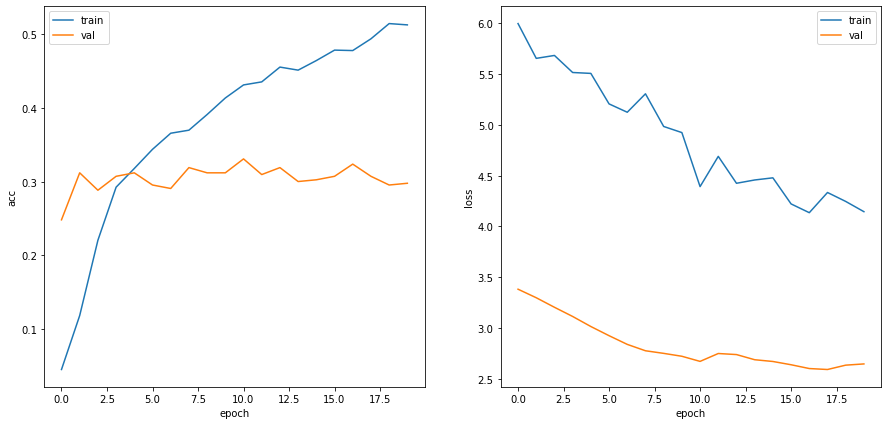

In [16]:
type(loss_hist)
hist = loss_hist.history
list(hist)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

### Conclusion for RNN Part:

Based on the plot shown above, the performance cannot exceed the limitation of 35%. Therefore, it's obvious to come up with the conclusion that RNN is not suitable for the EEG dataset. Based on the outcome shown, to improve the perofrmance, more data may be needed since the model get overfitted very easily. We can observe that according to the fact that the accuracy doesn't improve after 20 epochs.

### Filter Bank Common Spatial Pattern:

In [ ]:
print()